<a href="https://colab.research.google.com/github/deva237/Task2_Movie_rating_codsoft/blob/main/codsoft_moving_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2  MOVIE RATING PREDICTION WITH PYTHON**

Build a model that predicts the rating of a movie based on
 features like genre, director, and actors. You can use regression
 techniques to tackle this problem.
 The goal is to analyze historical movie data and develop a model
 that accurately estimates the rating given to a movie by users or
 critics.
 Movie Rating Prediction project enables you to explore data
 analysis, preprocessing, feature engineering, and machine
 learning modeling techniques. It provides insights into the factors
 that influence movie ratings and allows you to build a model that
 can estimate the ratings of movies accurately.

# **Step 1 Load the dataset**

In [ ]:
# Load the dataset
df = pd.read_csv("movie.csv", encoding='ISO-8859-1')

# Display the first few entries in the dataset
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# **Step 2 Data exploration**

In [ ]:
missing_values=df.isnull().sum()
# missing_values
print('Missing values\n', missing_values)
data_description=data.describe(include='all')
# data_description
print('Data description\n', data_description)

Missing values
 Name           0
Year         528
Duration    8269
Genre          0
Rating         0
Votes          0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
Data description
          Name    Year Duration  Genre       Rating Votes      Director  \
count    5659    5659     5659   5659  5659.000000  5659          5659   
unique   5385      91      174    376          NaN  2027          2431   
top     Baazi  (2019)  120 min  Drama          NaN     7  David Dhawan   
freq        4     227      169    844          NaN    90            41   
mean      NaN     NaN      NaN    NaN     5.898533   NaN           NaN   
std       NaN     NaN      NaN    NaN     1.381165   NaN           NaN   
min       NaN     NaN      NaN    NaN     1.100000   NaN           NaN   
25%       NaN     NaN      NaN    NaN     5.000000   NaN           NaN   
50%       NaN     NaN      NaN    NaN     6.100000   NaN           NaN   
75%       NaN     NaN      NaN    NaN     6

# **Step 3 Data Preprocessing**

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Replace NaN values in numeric columns with the mean of each column
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

# Convert 'Votes' column to numeric, coercing errors to NaN
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(df['Votes'].mean())

# Display the first few rows after replacing NaN values
print("After replacing NaN values with column mean:")

label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

# Feature Scaling
scaler = StandardScaler()
df[['Rating', 'Votes']] = scaler.fit_transform(df[['Rating', 'Votes']])
print(df.head())

After replacing NaN values with column mean:
                                 Name    Year Duration  Genre        Rating  \
0                                         NaN      NaN    299  1.408994e-16   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min    299  1.173266e+00   
2                         #Homecoming  (2021)   90 min    351  1.408994e-16   
3                             #Yaaram  (2019)  110 min    228 -1.460150e+00   
4                   ...And Once Again  (2010)  105 min    299  1.408994e-16   

          Votes            Director       Actor 1             Actor 2  \
0  1.276786e-17       J.S. Randhawa      Manmauji              Birbal   
1 -8.942463e-01       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2  1.276786e-17  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3 -6.802729e-01          Ovais Khan       Prateik          Ishita Raj   
4  1.276786e-17        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  

# **Step 4 Feature selection**

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
# Changed from chi2 to f_regression
from sklearn.preprocessing import MinMaxScaler


# Assume 'Rating' is the target variable, and the other columns are features
X = df.drop('Rating', axis=1)
y = df['Rating']

# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = X.select_dtypes(include=['object']).columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Apply MinMaxScaler to scale features to a range of 0 to 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest with f_regression to extract the top 2 best features
# Use f_regression for continuous target variables
bestfeatures = SelectKBest(score_func=f_regression, k=2)
fit = bestfeatures.fit(X_scaled, y)

# Create dataframes to store scores and feature names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat the dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the columns
print(featureScores.nlargest(2, 'Score'))  # Print the 2 best features

   Specs       Score
1   Year  139.460486
3  Genre  100.783997


# **Step 5 Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 6 Built a model**

In [ ]:
# random classifier model
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Decision tree Regressor

from sklearn.tree import DecisionTreeRegressor # Changed from DecisionTreeClassifier

# Create Decision Tree Regressor object
clf = DecisionTreeRegressor()

# Train Decision Tree Regressor
clf = clf.fit(X_train,y_train)

In [ ]:
# logistic regression

from sklearn.linear_model import LinearRegression # Changed to LinearRegression

# Create a Linear Regression model
logreg = LinearRegression()

# Train the model
logreg.fit(X_train, y_train)

LinearRegression()

# **Step 7 Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.6966955377480963
Mean Absolute Error: 0.4676029680884223
R-squared: 0.2943973258395317


# **Step 8 Visualizations**

**Histogram**

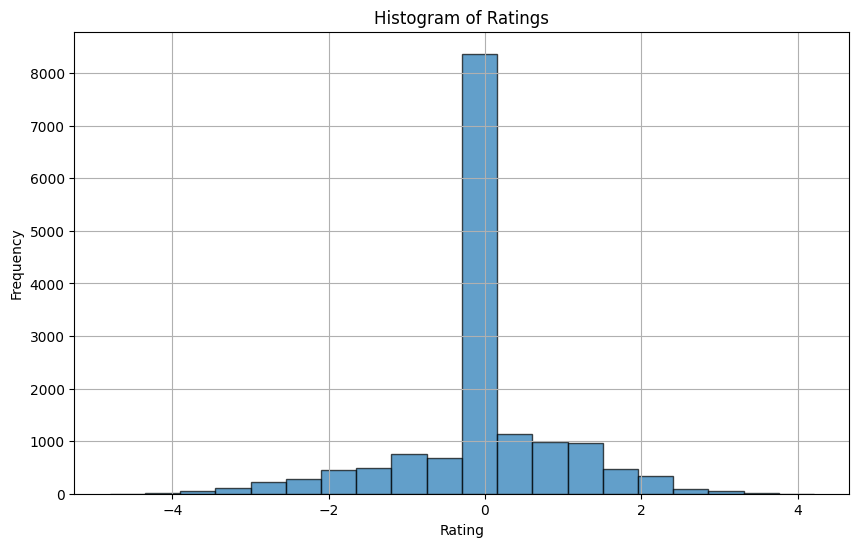

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Scatter plot**

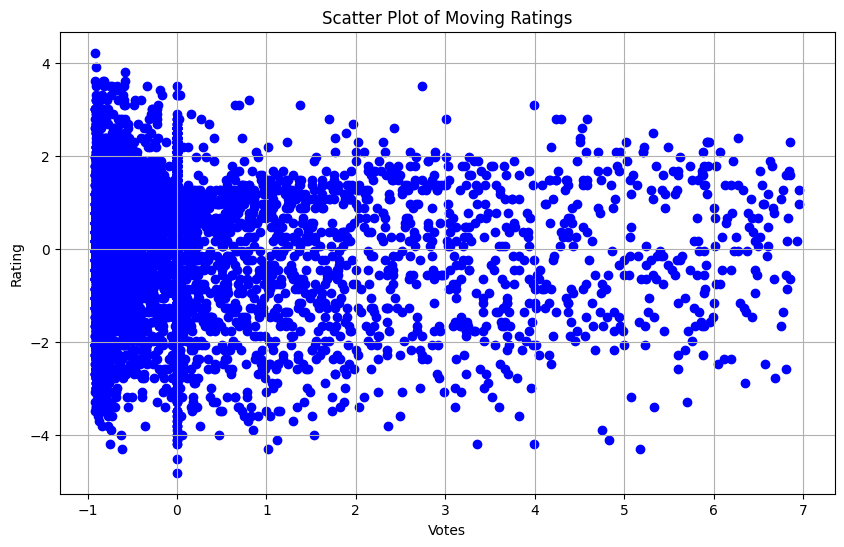

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Rating'], color='blue', marker='o')

# Add titles and labels
plt.title('Scatter Plot of Moving Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')

# Show the plot
plt.grid(True)
plt.show()

**Pie chart**

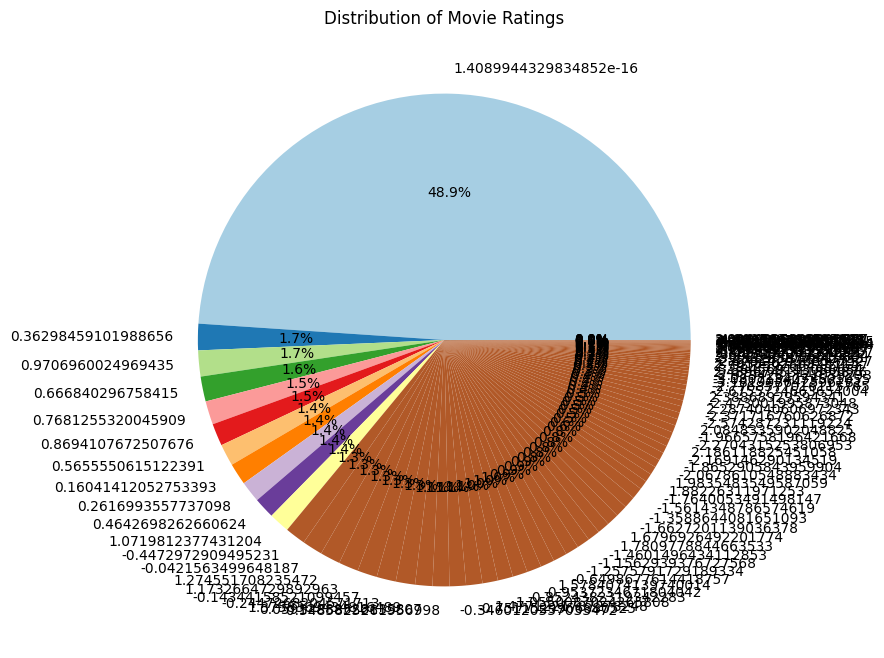

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
rating_counts = df['Rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(rating_counts))))

# Add title
plt.title('Distribution of Movie Ratings')

# Show the plot
plt.show()

**HeatMap**

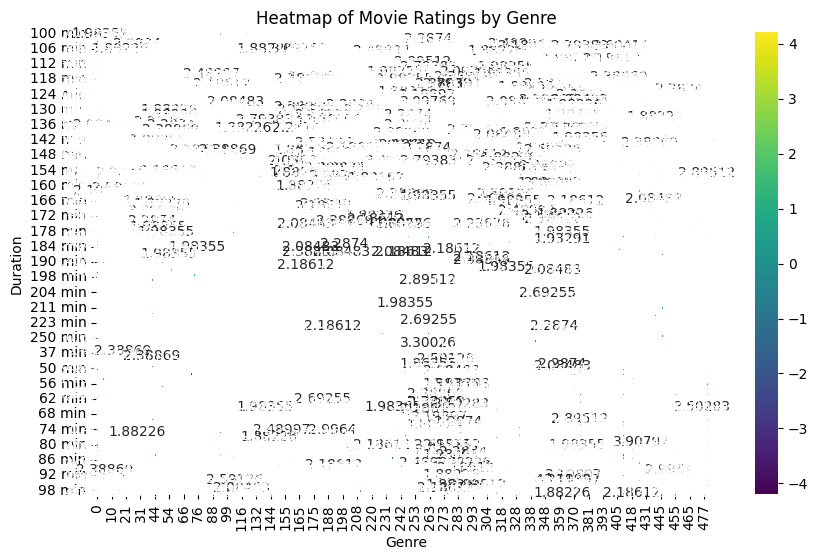

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pivot_table = df.pivot_table(index='Duration', columns='Genre', values='Rating')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', linewidths=.5, fmt='g')

# Add titles and labels
plt.title('Heatmap of Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration')

# Show the plot
plt.show()

**Box Plot**

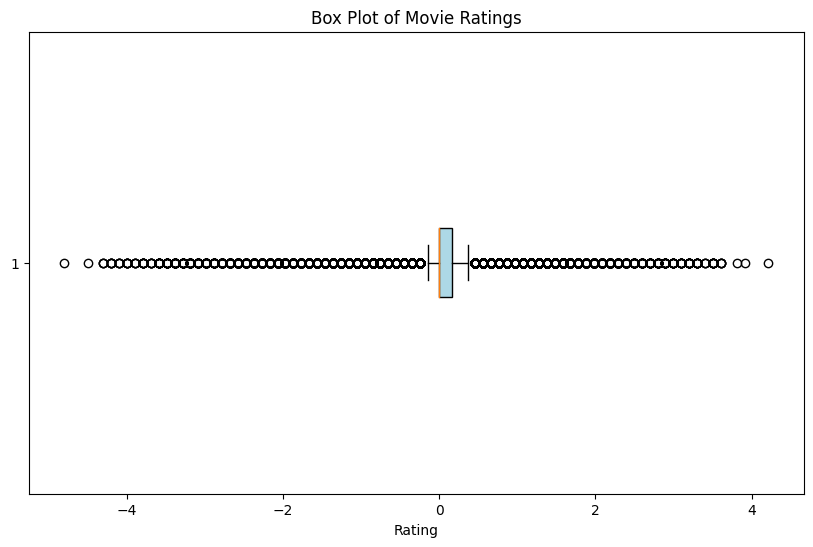

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd


# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Rating'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add titles and labels
plt.title('Box Plot of Movie Ratings')
plt.xlabel('Rating')

# Show the plot
plt.show()
